In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [45]:
f = h5py.File('/reg/d/psdm/cxi/cxilp6715/results/combined_tables/used_in_OE/run13.tbl','r')
f5 = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/gai/run108.tbl','r')

In [46]:
f5.keys()

[u'ebeam',
 u'event_time',
 u'evr',
 u'fiducials',
 u'gas_detector',
 u'phase_cav',
 u'polar_imgs',
 u'polar_mask',
 u'polar_mask_binned',
 u'polar_params',
 u'radial_profs']

In [48]:

rp = f['radial_profs'].value[:100]
rp2 = f5['radial_profs'].value[:100]

pulse = np.nan_to_num((f['gas_detector']['f_21_ENRC'].value +f['gas_detector']['f_22_ENRC'].value)*0.5)
pulse2 = np.nan_to_num((f5['gas_detector']['f_21_ENRC'].value +f5['gas_detector']['f_22_ENRC'].value)*0.5)

In [66]:
int1 = rp.mean(-1)/ pulse[:100]
int2=rp2.mean(-1)/pulse2[:100]
norm_rp1 = rp/pulse[:100,None]
norm_rp2 = rp2/pulse2[:100,None]

In [67]:
int1.mean()

9.965067961699388

In [68]:
int2.mean()

7.6317196112906966

(0, 300)

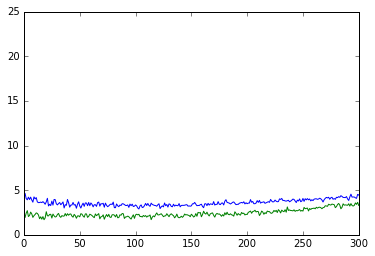

In [83]:
plt.plot(norm_rp1[20])
plt.plot(norm_rp2[10])
plt.xlim(0,300)

(array([  2.,  14.,  50.,  27.,   6.,   0.,   0.,   0.,   0.,   1.]),
 array([ 11.01682377,  13.99193583,  16.96704788,  19.94215994,
         22.917272  ,  25.89238405,  28.86749611,  31.84260817,
         34.81772022,  37.79283228,  40.76794434]),
 <a list of 10 Patch objects>)

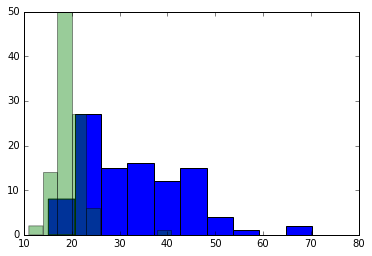

In [56]:
plt.hist(int1)
plt.hist(int2, alpha=0.4)

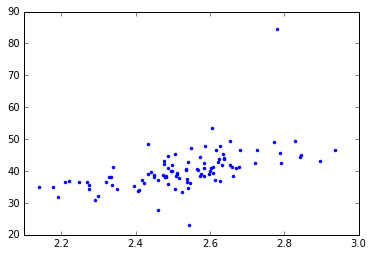

In [80]:
# plt.plot(pulse[:100],rp.mean(-1),'.')
plt.plot(pulse2[:100],rp2.max(-1),'.')

In [84]:
rp[:,0].mean(),rp2[:,0].mean()

(12.186738, 5.3248229)

In [85]:
basic_mask = np.load('/reg/d/psdm/cxi/cxilr6716/results/masks/basic_psana_mask.npy')

In [130]:
im = (np.ones_like(basic_mask)*basic_mask).astype(float)
# im[180,458:]=1e5

In [131]:
im[basic_mask].mean()

1.0

In [119]:
im[180,458]

True

In [91]:
np.sum(basic_mask)

2239810

In [102]:
basic_mask[180,456]

True